In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [178]:
data=pd.read_csv("data.csv")

In [179]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [191]:
M=data[data.diagnosis=="M"]
data.info()

B=data[data.diagnosis=="B"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [93]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

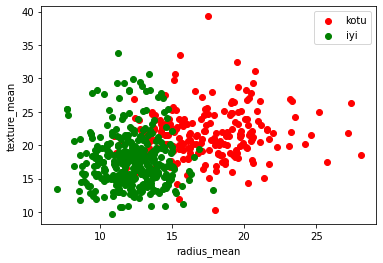

In [181]:
plt.scatter(M.radius_mean,M.texture_mean,color="red", label="kotu")
plt.scatter(B.radius_mean,B.texture_mean,color="green", label="iyi")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [182]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [183]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [184]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,metric='euclidean') # n_neighbors = k
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


In [186]:
from sklearn.metrics import classification_report, confusion_matrix


In [187]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [188]:
cmat = confusion_matrix(y_test, prediction)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 106
FP - False Positive 2
FN - False Negative 6
TP - True Positive 57
Accuracy Rate: 0.9532163742690059
Misclassification Rate: 0.04678362573099415


k=1 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



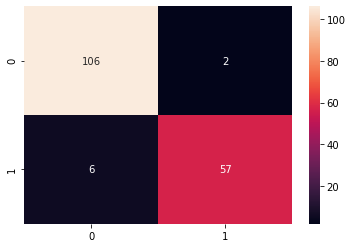

k=3 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



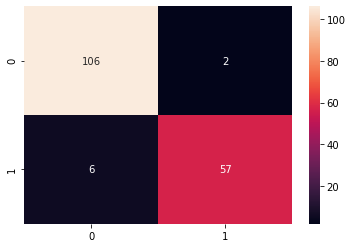

k=5 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



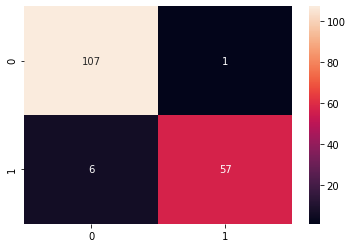

k=7 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9649122807017544 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



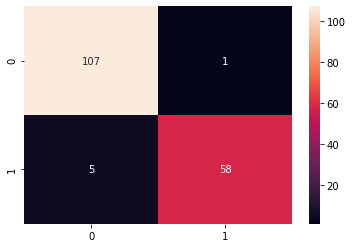

k=9 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9649122807017544 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



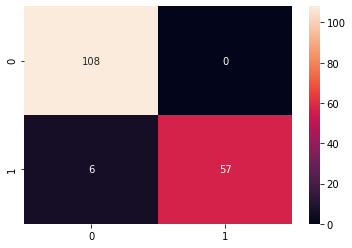

k=11 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



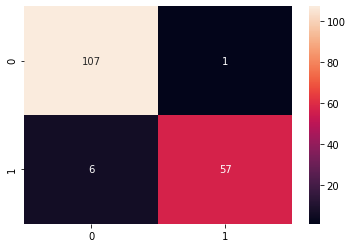

k=13 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



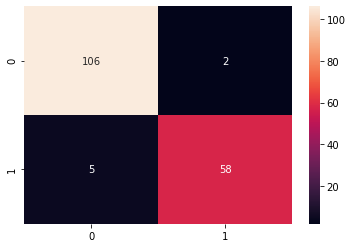

k=15 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



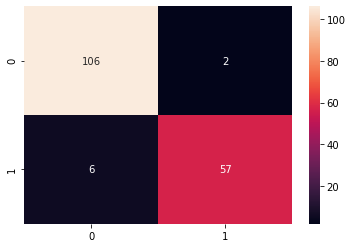

k=17 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



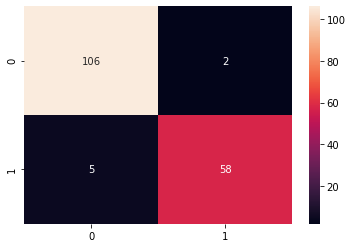

k=19 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



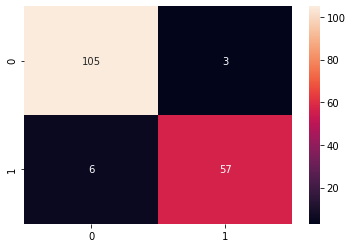

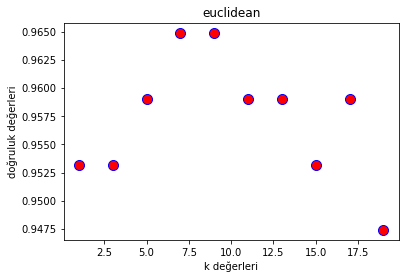

k=1 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



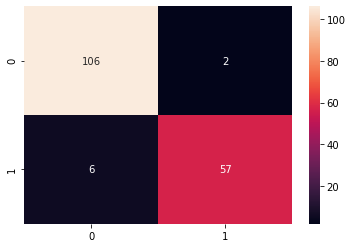

k=3 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



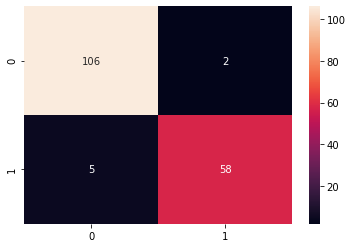

k=5 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9649122807017544 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



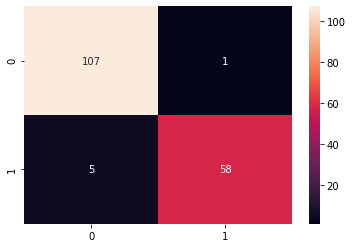

k=7 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



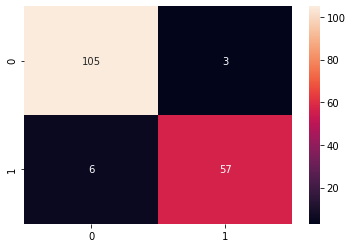

k=9 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.97      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



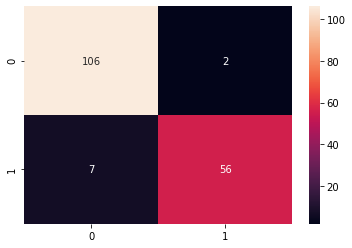

k=11 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



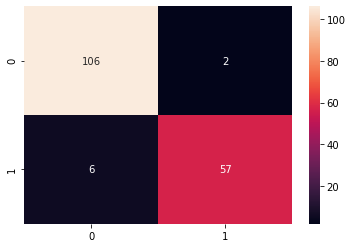

k=13 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



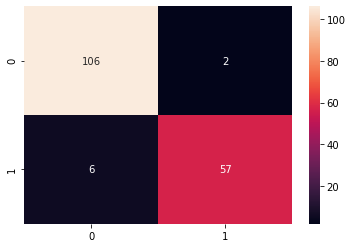

k=15 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



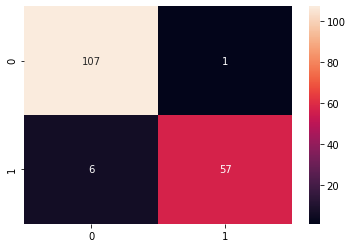

k=17 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



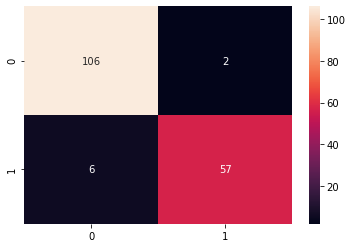

k=19 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



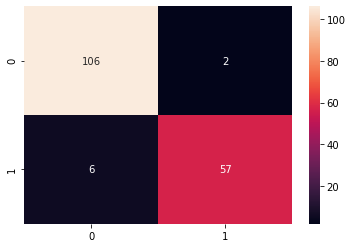

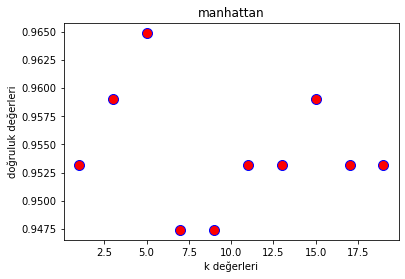

k=1 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.9415204678362573 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



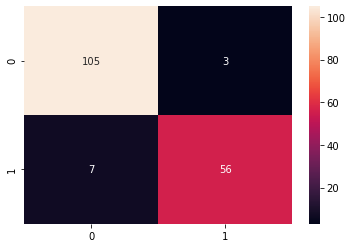

k=3 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



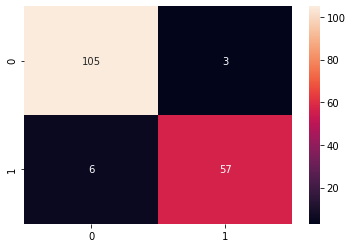

k=5 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.97      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



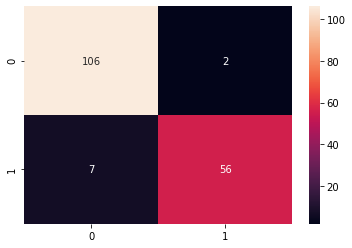

k=7 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.9415204678362573 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



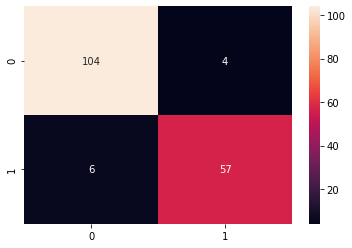

k=9 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.935672514619883 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



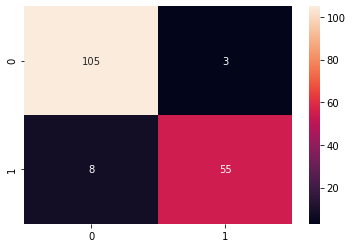

k=11 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.935672514619883 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



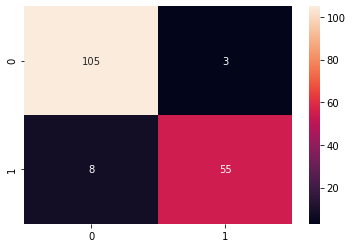

k=13 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.935672514619883 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



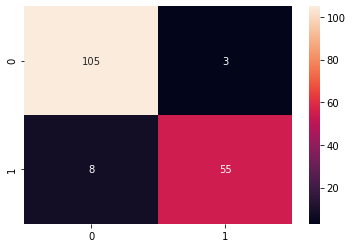

k=15 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.935672514619883 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



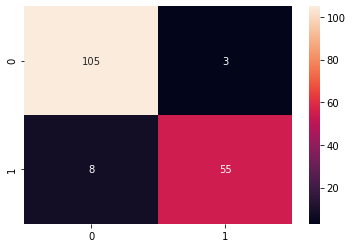

k=17 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.935672514619883 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



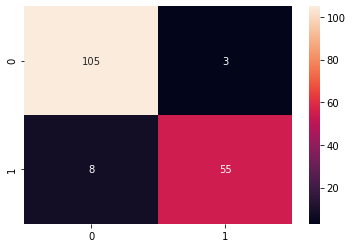

k=19 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.9239766081871345 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



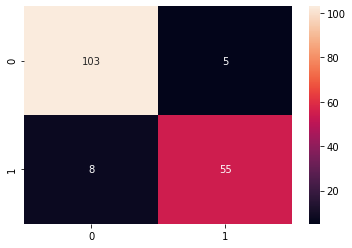

k=1 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



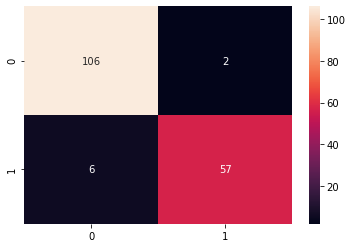

k=3 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



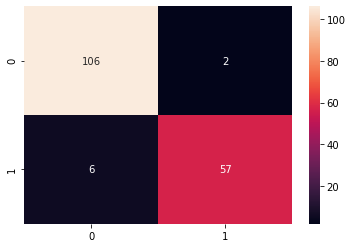

k=5 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



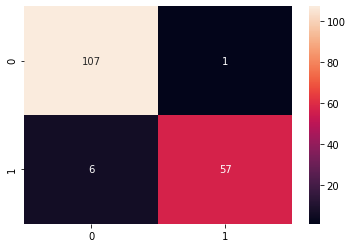

k=7 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9649122807017544 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



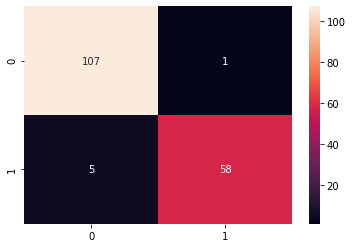

k=9 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9649122807017544 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



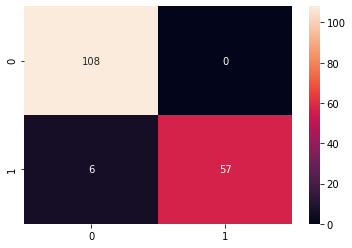

k=11 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



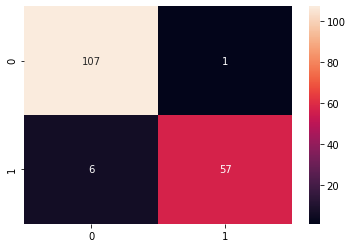

k=13 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



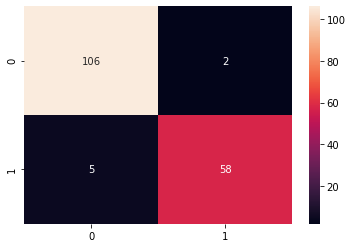

k=15 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9532163742690059 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



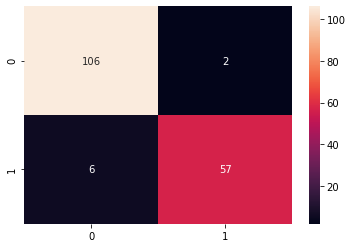

k=17 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9590643274853801 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



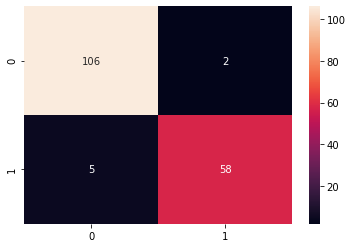

k=19 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.9473684210526315 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



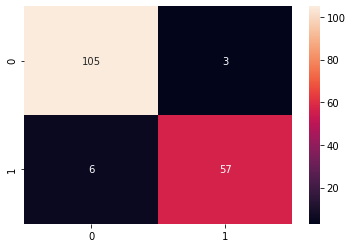

In [189]:
score_list = []
metric_list=['euclidean','manhattan','chebyshev','minkowski']
for mtrc in metric_list:
    for each in range(1,20,2):
        knn2 = KNeighborsClassifier(n_neighbors = each,metric=mtrc)
        knn2.fit(x_train,y_train)
        prediction = knn2.predict(x_test)
        score_list.append(knn2.score(x_test,y_test))
        cm = confusion_matrix(y_test,prediction)
        print("k={} Uzaklık Yöntemi={} Doğruluk Değeri: {} ".format(each,mtrc,knn2.score(x_test,y_test)))
        print(classification_report(y_test, prediction))
        sns.heatmap(cm,annot=True,fmt="d") 
        plt.show()
    plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
    plt.title(mtrc)
    plt.xlabel("k değerleri")
    plt.ylabel("doğruluk değerleri")
    plt.show()
    score_list.clear()
